---
title: Lab 5
jupyter: python3
format:
    html:
        embed-resources: true
---

# Lab 5: Insurance Costs
### Instructions
You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final knitted file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

There may be a small penalty for submissions that are difficult to read or navigate.

# Part One: Data Exploration
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

Age of primary beneficiary

Gender of primary beneficiary (only female, male recorded)

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

Read in the dataset, and display some summaries of the data.

Fix any concerns you have about the data.

Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.



In [168]:
import pandas as pd
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [169]:
insurance.info()
print("Mean charges:", insurance['charges'].mean())
print("Median charges:", insurance['charges'].median())
print("Mode charges:", insurance['charges'].mode()[0])

print("Range:", insurance['charges'].max() - insurance['charges'].min())
print("Standard deviation:", insurance['charges'].std())
print(insurance['charges'].describe()[['min', '25%', '50%', '75%', 'max']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB
Mean charges: 12297.098118187932
Median charges: 9866.30485
Mode charges: 1639.5631
Range: 54003.89549
Standard deviation: 11876.527128004533
min     1131.506600
25%     2710.444575
50%     9866.304850
75%    14510.872600
max    55135.402090
Name: charges, dtype: float64


In [170]:
insurance.isna().sum()
insurance = insurance.drop_duplicates()
for col in ['sex', 'smoker', 'region']:
    insurance[col] = insurance[col].str.strip().str.lower()

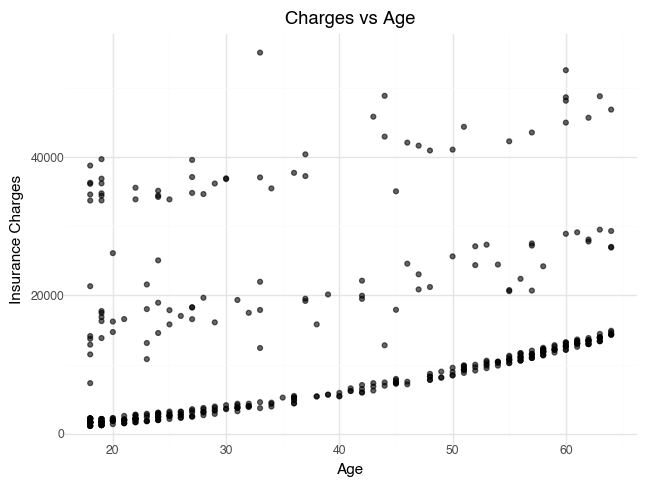

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_boxplot, labs, theme_minimal, geom_line, geom_hline

(ggplot(insurance, aes(x='age', y='charges'))
 + geom_point(alpha=0.6)
 + labs(title='Charges vs Age', x='Age', y='Charges')
 + theme_minimal())

This plot shows that insurance charges go up as people get older. Older people usually have higher costs than younger ones

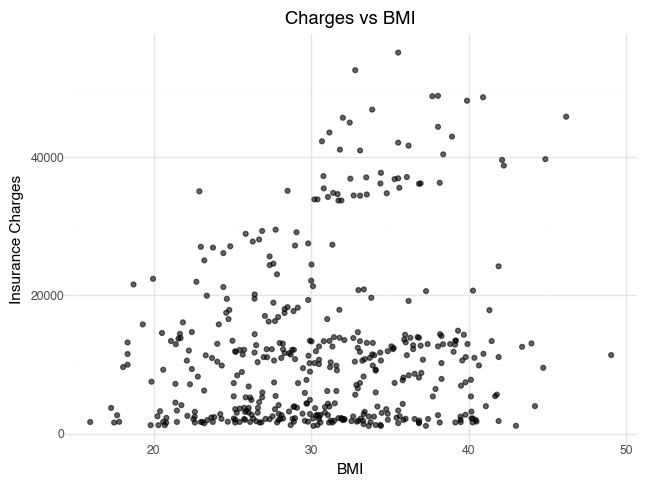

In [ ]:
(ggplot(insurance, aes(x='bmi', y='charges'))
 + geom_point(alpha=0.6)
 + labs(title='Charges vs BMI', x='BMI', y='Charges')
 + theme_minimal())

People with higher BMI often have higher insurance charges, but the points are spread out, so BMI alone doesn’t explain everything

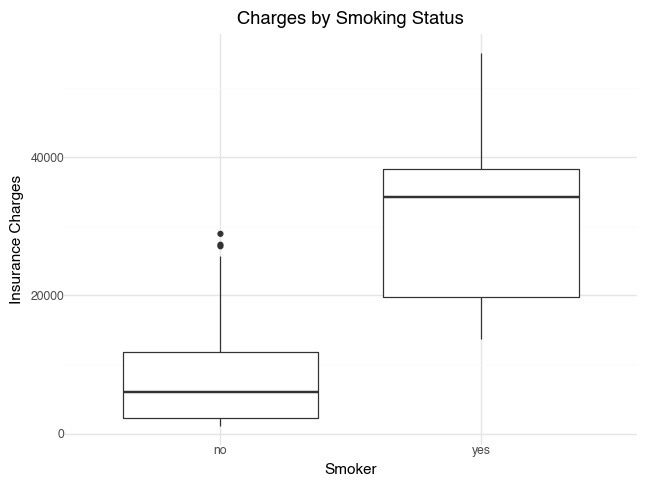

In [ ]:
(ggplot(insurance, aes(x='smoker', y='charges'))
 + geom_boxplot()
 + labs(title='Charges by Smoking', x='Smoker', y='Charges')
 + theme_minimal())

Smokers pay much higher insurance charges than non-smokers. The difference is big, showing smoking has a strong effect on cost

# Part Two: Simple Linear Models
Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

Make a model that also incorporates the variable sex. Report your results.

Now make a model that does not include sex, but does include smoker. Report your results.

Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
X = insurance[['age']]
y = insurance['charges']

m_age = LinearRegression().fit(X, y)

m_age = LinearRegression().fit(X, y)
insurance['pred_age'] = m_age.predict(X)

print("Intercept:", m_age.intercept_)
print("Coefficient for age:", m_age.coef_[0])
print("MSE:", mean_squared_error(y, insurance['pred_age']))
print("R²:", r2_score(y, insurance['pred_age']))

Intercept: 3666.2189868362257
Coefficient for age: 227.7527574041992
MSE: 126940631.18018842
R²: 0.0983506372597216


The intercept is 3666.22, and the coefficient for age is 227.75.
This means each extra year of age increases charges by about $228.
The R Squared is 0.098 shows the model isn’t very strong, age only explains around 10% of the changes in insurance costs.

In [176]:
insurance['sex_male'] = (insurance['sex'] == 'male').astype(int)
X2 = insurance[['age', 'sex_male']]
y = insurance['charges']

m_age_sex = LinearRegression().fit(X2, y)
insurance['pred_age_sex'] = m_age_sex.predict(X2)

print("Intercept:", m_age_sex.intercept_)
print("Coefficients:", m_age_sex.coef_)
print("MSE:", mean_squared_error(y, insurance['pred_age_sex']))
print("R²:", r2_score(y, insurance['pred_age_sex']))

Intercept: 3357.733786003182
Coefficients: [227.30016043 683.14622527]
MSE: 126824266.07050838
R²: 0.09917716952139966


In [177]:
insurance['smoker_yes'] = (insurance['smoker'] == 'yes').astype(int)

X3 = insurance[['age', 'smoker_yes']]
y = insurance['charges']

m_age_smoker = LinearRegression().fit(X3, y)
insurance['pred_age_smoker'] = m_age_smoker.predict(X3)

print("Intercept:", m_age_smoker.intercept_)
print("Coefficients:", m_age_smoker.coef_)
print("MSE:", mean_squared_error(y, insurance['pred_age_smoker']))
print("R²:", r2_score(y, insurance['pred_age_smoker']))

Intercept: -2157.4258058709966
Coefficients: [  252.97585568 24045.6481485 ]
MSE: 33795894.025217645
R²: 0.7599504112452276


The model Q3 fits the data better than the model Q2. First we have a lower MSE for model Q3 showing more accurate predictions
Second the R Squared increases for model Q3 showing the variables explain more of the variation in the charges than model Q2

# Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [178]:
X4 = insurance[['age', 'bmi']]
y = insurance['charges']

m_age_bmi = LinearRegression().fit(X4, y)
insurance['pred_age_bmi'] = m_age_bmi.predict(X4)

print("MSE:", mean_squared_error(y, insurance['pred_age_bmi']))
print("R²:", r2_score(y, insurance['pred_age_bmi']))

MSE: 123981357.75633557
R²: 0.11937012465303443


Compared to the model from task 2 Q1, this model has a saller MSE and a higher R Squared, adding BMI add to the explanation of variance in charges more not having BMI as a variable

In [179]:
insurance['age2'] = insurance['age'] ** 2

X5 = insurance[['age', 'age2']]
y = insurance['charges']

m_age_poly2 = LinearRegression().fit(X5, y)
insurance['pred_age_poly2'] = m_age_poly2.predict(X5)

print("MSE:", mean_squared_error(y, insurance['pred_age_poly2']))
print("R²:", r2_score(y, insurance['pred_age_poly2']))


MSE: 126916091.59571704
R²: 0.09852494000656331


The R squared of this model and the one from Q1 task 2 are almost the same, both around 0.099, the same goes for the MSE

In [180]:
from sklearn.preprocessing import PolynomialFeatures

poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4.fit_transform(insurance[['age']])
y = insurance['charges']

m_poly4 = LinearRegression().fit(X_poly4, y)
insurance['pred_poly4'] = m_poly4.predict(X_poly4)

print("MSE:", mean_squared_error(y, insurance['pred_poly4']))
print("R²:", r2_score(y, insurance['pred_poly4']))

MSE: 125752238.88482983
R²: 0.106791694672415


In [181]:
poly12 = PolynomialFeatures(degree=12, include_bias=False)
X_poly12 = poly12.fit_transform(insurance[['age']])

m_poly12 = LinearRegression().fit(X_poly12, y)
insurance['pred_poly12'] = m_poly12.predict(X_poly12)

print("MSE:", mean_squared_error(y, insurance['pred_poly12']))
print("R²:", r2_score(y, insurance['pred_poly12']))


MSE: 125817853.66920729
R²: 0.10632563799717842


The degree 4 and 12 models only improve the fit a little compared to model from Task 2.
MSE drops slightly and R Squared increases a little bit 


If we look at just MSE and R squared Model 4 would be the best fit, with the lowest MSE and highest R squared. I think this model is best because of the above measurements

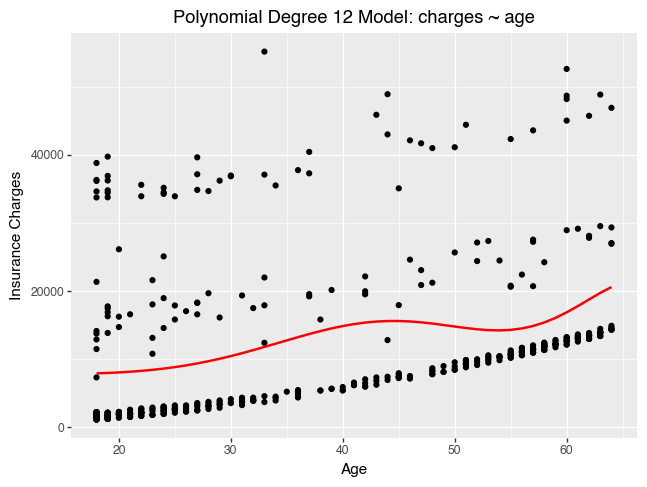

In [ ]:
(ggplot(insurance, aes(x='age', y='charges'))
    + geom_point()
    + geom_line(aes(y='pred_poly12'), color='red', size=1)
    + labs(title='Polynomial Degree 12',
    x='Age', y='Charges'))

# Part Four: New data
Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.



In [183]:
insurance2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
insurance2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [184]:
X6 = insurance[['age']]
y = insurance['charges']
m1 = LinearRegression().fit(X6, y)

insurance2['pred1'] = m1.predict(insurance2[['age']])
mse1 = mean_squared_error(insurance2['charges'], insurance2['pred1'])


In [185]:
X7 = insurance[['age', 'bmi']]
y = insurance['charges']
m2 = LinearRegression().fit(X7, y)

insurance2['pred2'] = m2.predict(insurance2[['age', 'bmi']])
mse2 = mean_squared_error(insurance2['charges'], insurance2['pred2'])


In [186]:
insurance2['smoker_yes'] = (insurance2['smoker'] == 'yes').astype(int)

X8 = insurance[['age', 'bmi', 'smoker_yes']]
y = insurance['charges']
m3 = LinearRegression().fit(X8, y)

insurance2['pred3'] = m3.predict(insurance2[['age', 'bmi', 'smoker_yes']])
mse3 = mean_squared_error(insurance2['charges'], insurance2['pred3'])


In [187]:
insurance['age_smoker'] = insurance['age'] * insurance['smoker_yes']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker_yes']

insurance2['age_smoker'] = insurance2['age'] * insurance2['smoker_yes']
insurance2['bmi_smoker'] = insurance2['bmi'] * insurance2['smoker_yes']

X9 = insurance[['age_smoker', 'bmi_smoker']]
y = insurance['charges']
m4 = LinearRegression().fit(X9, y)

insurance2['pred4'] = m4.predict(insurance2[['age_smoker', 'bmi_smoker']])
mse4 = mean_squared_error(insurance2['charges'], insurance2['pred4'])


In [188]:
X10 = insurance[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y = insurance['charges']
m5 = LinearRegression().fit(X10, y)

insurance2['pred5'] = m5.predict(
    insurance2[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']])
mse5 = mean_squared_error(insurance2['charges'], insurance2['pred5'])


In [189]:
print(mse1)
print(mse2)
print(mse3)
print(mse4)
print(mse5)

136103052.1315194
132661845.98612574
35384940.30267553
47619478.52385583
21789294.045829594


Model 2 has the lowest MSE, basing it of the lowest MSE Model 2 where we use age and bmi as predictors would be the best fit in explaining insurance charges

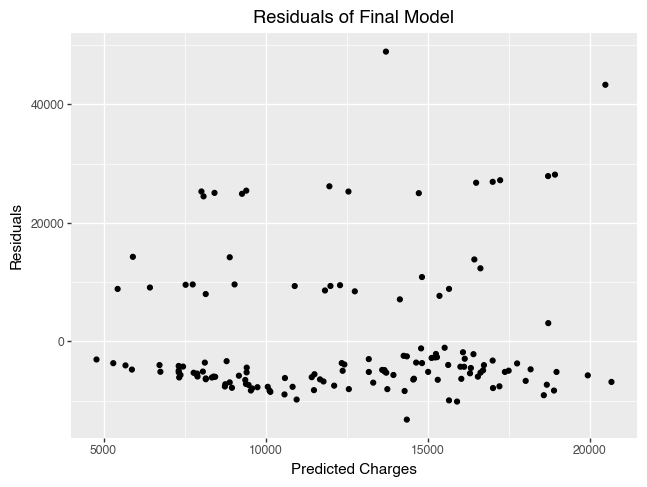

In [190]:
insurance2['residuals2'] = insurance2['charges'] - insurance2['pred2']

(ggplot(insurance2, aes(x='pred2', y='residuals2'))
    + geom_point()
    + labs(
    title='Residuals of Final Model',
    x='Predicted Charges',
    y='Residuals'))

# Part Five: Full Exploration
Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [191]:
X_train = insurance[['age', 'bmi']]
y_train = insurance['charges']

X_test = insurance2[['age', 'bmi']]
y_test = insurance2['charges']
for d in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    m = LinearRegression().fit(X_train_poly, y_train)
    preds = m.predict(X_test_poly)
    mse = mean_squared_error(y_test, preds)
    print(f"Degree {d} MSE:", mse)



Degree 1 MSE: 132661845.98612574
Degree 2 MSE: 135400857.45626295
Degree 3 MSE: 138616953.4261243
Degree 4 MSE: 169885594.25564536


The degree 1 model had the lowest MSE, so it predicts the new data the best. Using higher-degree polynomials actually made the model worse, meaning adding extra complexity didn’t help improve accuracy.

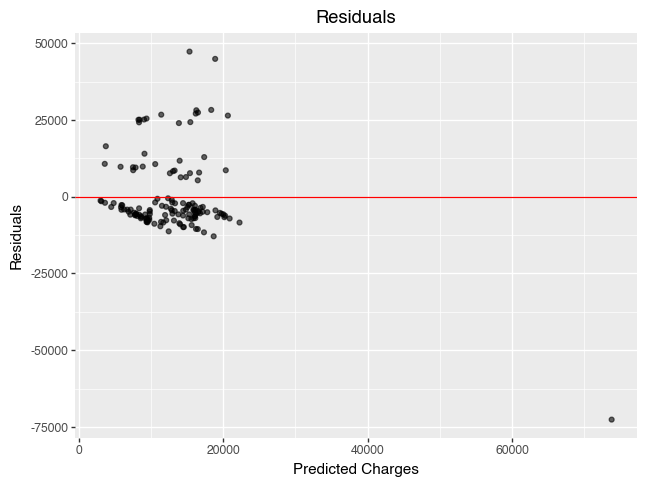

In [192]:
insurance2['pred_final'] = preds  
insurance2['resid_final'] = y_test - preds

(ggplot(insurance2, aes(x='pred_final', y='resid_final'))
    + geom_point(alpha=0.6)
    + geom_hline(yintercept=0, color='red')
    + labs(
        title='Residuals',
        x='Predicted Charges',
        y='Residuals'))